In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

In [2]:
clean_earthquake = pd.read_csv('../dq3-earthquakes-down-to-earth/cleandata.csv')

In [3]:
clean_earthquake['Year'] = clean_earthquake['Origin (UTC)'].str.extract('(\d{4})')

In [4]:
clean_earthquake

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Deaths,Year
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0,0.0,1900
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0,140.0,1900
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0,0.0,1900
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0,0.0,1901
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0,4.0,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150,150.0,2011
1241,2011-04-07 14:32,Japan,38.2,140.0,66.0,7.1,NaN,NaN,NaN,NaN,NaN,0,0.0,2011
1242,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,L,NaN,NaN,NaN,NaN,111,111.0,2011
1243,2011-09-23 10:41,Turkey,38.6,43.5,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601,601.0,2011


In [5]:
common_quakes = clean_earthquake['Present-day country and link to Wikipedia article'].value_counts()
common_quakes

China                              153
Indonesia                           95
Iran                                85
Turkey                              82
Japan                               82
                                  ... 
Tajik Soviet Socialist Republic      1
Sudan                                1
Martinique                           1
Vietnam                              1
Macedonia                            1
Name: Present-day country and link to Wikipedia article, Length: 103, dtype: int64

In [6]:
country_deaths = clean_earthquake.groupby('Present-day country and link to Wikipedia article').agg(sum).sort_values(by='Deaths',ascending=False).reset_index()

In [13]:
deadliest_quakes = country_deaths.drop(['Magnitude','PDE Shaking Deaths','PDE Total Deaths','Utsu Total Deaths','EM-DAT Total Deaths','Other Source Deaths'], axis=1)
top_10_deadly = deadliest_quakes.head(10)

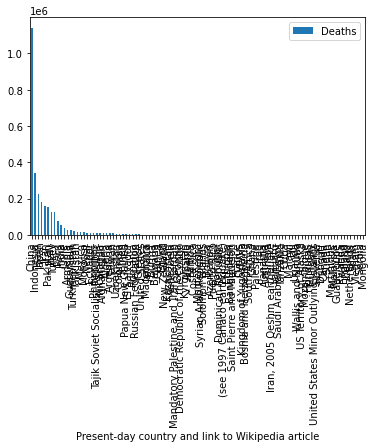

In [8]:
deadliest_quakes.plot(kind='bar', x='Present-day country and link to Wikipedia article',y='Deaths')

In [9]:
strongest_quakes = clean_earthquake.groupby('Present-day country and link to Wikipedia article').agg('mean').reset_index().drop(['Deaths','PDE Shaking Deaths','PDE Total Deaths','Utsu Total Deaths','EM-DAT Total Deaths','Other Source Deaths'], axis=1)

In [14]:
strongest_quakes = strongest_quakes.sort_values('Magnitude', ascending=False)
top_10_strong = strongest_quakes.head(10)

In [11]:
#look into population density: looks like none of the strongest quakes top five match up with deadliest quakes top five, could do a line graph of pop density by year of top 5 deadly and top 5 strong to show the disparity. pull year range of the clean earthquakes data frame

In [17]:
top_10_deadly['Present-day country and link to Wikipedia article']

0        China
1    Indonesia
2        Haiti
3        Japan
4         Iran
5     Pakistan
6        Italy
7       Turkey
8         Peru
9        India
Name: Present-day country and link to Wikipedia article, dtype: object

In [18]:
top_10_strong['Present-day country and link to Wikipedia article']

77                              Samoa
57                           Mongolia
81                    Solomon Islands
87    Tajik Soviet Socialist Republic
55                         Martinique
14                              Chile
72                        Puerto Rico
76          Saint Pierre and Miquelon
93             US Territory of Alaska
78                 Saudi Arabia/Egypt
Name: Present-day country and link to Wikipedia article, dtype: object